# Predicting Daily Confirmed COVID-19 cases in India

### Importing Libraries and reading data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import datetime

In [193]:
data = pd.read_csv('nation_level_daily.csv')

In [194]:
data.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0


In [240]:
data.describe()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,2964.534722,68825.541667,1647.590278,31621.770833,95.166667,2081.611111
std,4112.913227,109756.848653,2771.046495,56897.007087,195.258695,3339.289536
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.750000,30.750000,0.000000,3.000000,0.000000,0.000000
50%,833.500000,8026.000000,113.000000,879.000000,27.000000,269.500000
75%,4669.500000,91911.250000,2496.000000,34891.500000,134.750000,2910.000000
max,15918.000000,426893.000000,13974.000000,237253.000000,2004.000000,13704.000000


### Finding the correlation between different variables

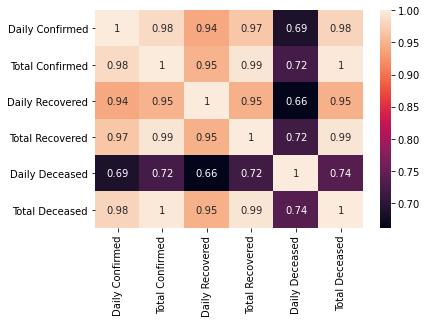

In [196]:
sns.heatmap(data.corr(),annot=True)

In [241]:
data.columns

Index(['Date', 'Daily Confirmed', 'Total Confirmed', 'Daily Recovered',
       'Total Recovered', 'Daily Deceased', 'Total Deceased'],
      dtype='object')

### Visualizing Variables to check relation between them

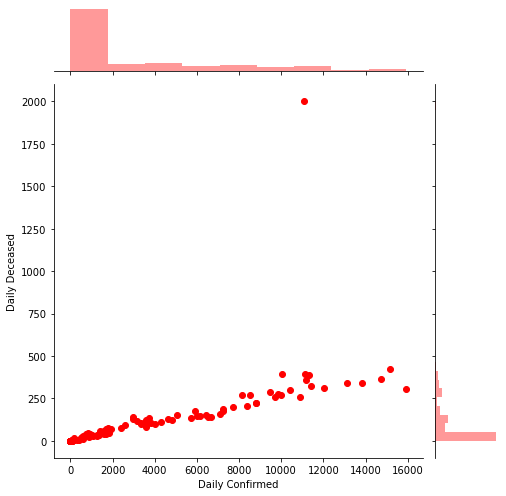

In [243]:
# date_df = pd.DataFrame(data.Date)
sns.jointplot(x='Daily Confirmed',y='Daily Deceased',data=data,height=7,color='r',dropna=True)

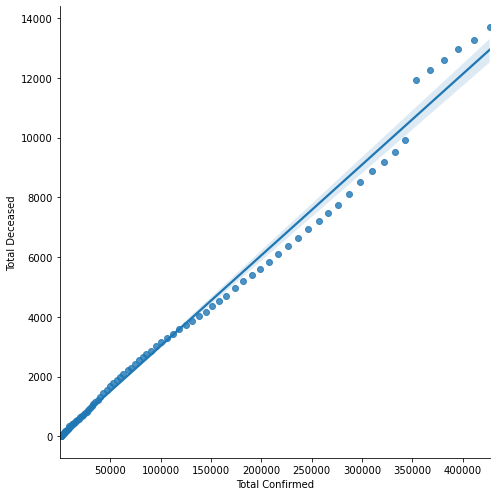

In [244]:
sns.lmplot(x='Total Confirmed',y='Total Deceased',data=data,height=7)

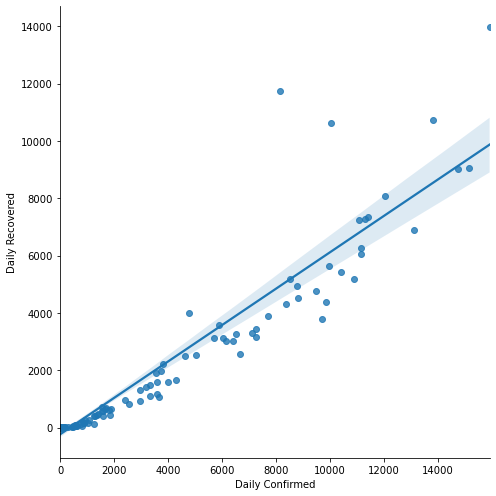

In [245]:
sns.lmplot(x='Daily Confirmed',y='Daily Recovered',data=data,height=7)

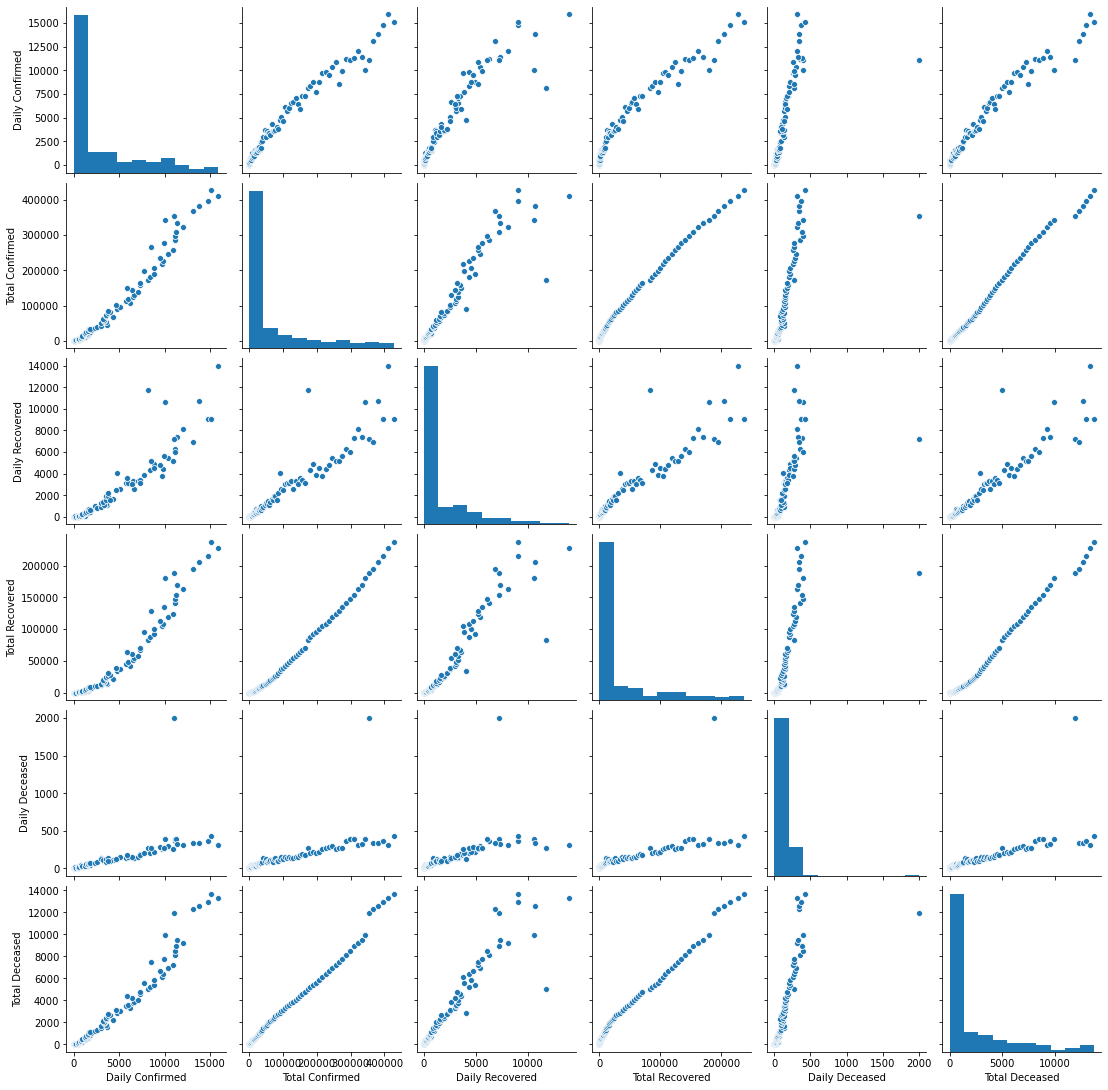

In [207]:
#sns.jointplot(x='Total Confirmed',y='Total Deceased',data=data)
sns.pairplot(data)

### Linear regression Model Using statsmodels.api 

### Model 1:
#### Predicting Dependent variable 'Daily Confirmed' cases from independent variables Daily Recovered, Daily Deceased, Total Recovered, Total Deceased, Total Confirmed

In [238]:
X = pd.DataFrame(data['Daily Confirmed'])
y = pd.DataFrame(data[['Daily Recovered','Total Recovered','Daily Deceased','Total Confirmed','Total Deceased']])

import statsmodels.api as sm
model_1 = sm.OLS(X,y)
fitmodel_1 = model_1.fit()
fitmodel_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Daily Confirmed   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              3603.
Date:                Thu, 27 Aug 2020   Prob (F-statistic):                   3.84e-145
Time:                        18:09:34   Log-Likelihood:                         -1081.7
No. Observations:                 144   AIC:                                      2173.
Df Residuals:                     139   BIC:                                      2188.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Daily Recovered     0.1216      0.044      2.739      0.007       0.034       0.209
Total Recovered    -0.1019      0.006    -17.047      0.000      -0.114      -0.090
Daily Deceased     -1.3355      0.298     -4.488      0.000      -1.924      -0.747
Total Confirmed     0.0703      0.004     15.843      0.000       0.062       0.079
Total Deceased      0.5969      0.150      3.979      0.000       0.300       0.894
==============================================================================
Omnibus:                       58.672   Durbin-Watson:                   1.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              398.517
Skew:                          -1.233   Prob(JB):                     2.90e-87
Kurtosis:                      10.768   Cond. No.                     1.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 2: 
#### Predicting Dependent variable 'Daily Confirmed' cases from independent variables Daily Recovered, Total Recovered and Total Deceased cases

In [236]:
X = pd.DataFrame(data['Daily Confirmed'])
y = pd.DataFrame(data[['Daily Recovered','Total Recovered','Daily Deceased']])

import statsmodels.api as sm
model_2 = sm.OLS(X,y)
fitmodel_2 = model_2.fit()
fitmodel_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Daily Confirmed   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                              856.0
Date:                Thu, 27 Aug 2020   Prob (F-statistic):                    2.99e-90
Time:                        17:56:01   Log-Likelihood:                         -1219.7
No. Observations:                 144   AIC:                                      2445.
Df Residuals:                     141   BIC:                                      2454.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Daily Recovered     0.4960      0.110      4.526      0.000       0.279       0.713
Total Recovered     0.0508      0.006      8.682      0.000       0.039       0.062
Daily Deceased      0.4269      0.716      0.596      0.552      -0.988       1.842
==============================================================================
Omnibus:                       38.903   Durbin-Watson:                   0.444
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.442
Skew:                          -0.989   Prob(JB):                     4.26e-27
Kurtosis:                       7.040   Cond. No.                         479.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 3: 
#### Predicting Dependent variable 'Daily Confirmed' cases from independent variables Daily Recovered and Total Recovered cases

In [237]:
X = pd.DataFrame(data['Daily Confirmed'])
y = pd.DataFrame(data[['Daily Recovered','Total Recovered']])

import statsmodels.api as sm
model_3 = sm.OLS(X,y)
fitmodel_3 = model_3.fit()
fitmodel_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Daily Confirmed   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                              1290.
Date:                Thu, 27 Aug 2020   Prob (F-statistic):                    8.80e-92
Time:                        17:56:29   Log-Likelihood:                         -1219.9
No. Observations:                 144   AIC:                                      2444.
Df Residuals:                     142   BIC:                                      2450.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Daily Recovered     0.4913      0.109      4.505      0.000       0.276       0.707
Total Recovered     0.0522      0.005      9.659      0.000       0.041       0.063
==============================================================================
Omnibus:                       36.634   Durbin-Watson:                   0.434
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.633
Skew:                          -0.934   Prob(JB):                     5.74e-25
Kurtosis:                       6.888   Cond. No.                         73.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 4: 
#### Predicting Dependent variable 'Daily Confirmed' cases from independent variables Daily Recovered

In [233]:
X = pd.DataFrame(data['Daily Confirmed'])
y = pd.DataFrame(data[['Daily Recovered']])

import statsmodels.api as sm
model_4 = sm.OLS(X,y)
fitmodel_4 = model_4.fit()
fitmodel_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Daily Confirmed   R-squared (uncentered):                   0.914
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                              1511.
Date:                Thu, 27 Aug 2020   Prob (F-statistic):                    6.72e-78
Time:                        17:49:21   Log-Likelihood:                         -1256.2
No. Observations:                 144   AIC:                                      2514.
Df Residuals:                     143   BIC:                                      2517.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Daily Recovered     1.5035      0.039     38.869      0.000       1.427       1.580
==============================================================================
Omnibus:                      136.501   Durbin-Watson:                   1.629
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2758.166
Skew:                          -3.255   Prob(JB):                         0.00
Kurtosis:                      23.428   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion:
1. We can see in above model that when there are 4 independent variable sin the model the R^2 value is 99.10%, which is the highest value in the model.
2. In Model 1 above the 'Total Confirmed' variable is more significant as the t-statistics of 'Total Confirmed' is 15.8, the highest among all other variables.
3. This tells us that model 1 is good option to study and predict, because R^2 is the highest in model 1 than other models.

### Final Equation for Model 1:

The linear regression equation to predict the Daily Confirmed Cases is given by:
Daily Confirmed = f ( Daily Recovered, Total Recovered, Daily Deceased, Total Confirmed, Total Deceased)

In mathematical form with coefficients:
#### Daily Confirmed = (0.1216 * Daily Recovered) - (0.1019 * Total Recovered) + (1.3355 * Daily Deceased) + (0.0703 * Total Confirmed) + (0.5969 * Total Deceased)